# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading and Studying the Dataset

In [2]:
data = pd.read_csv("breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
data.shape

(569, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


<Axes: >

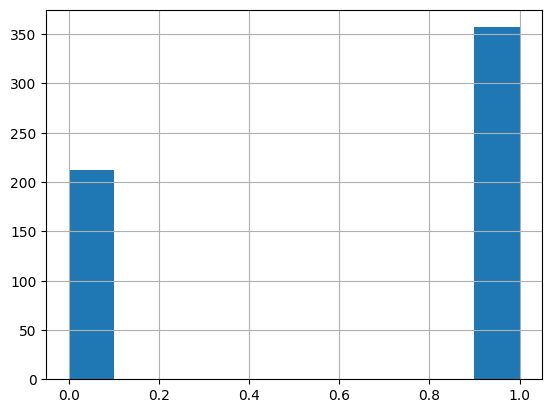

In [7]:
data['diagnosis'].hist()

In [8]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

<Axes: >

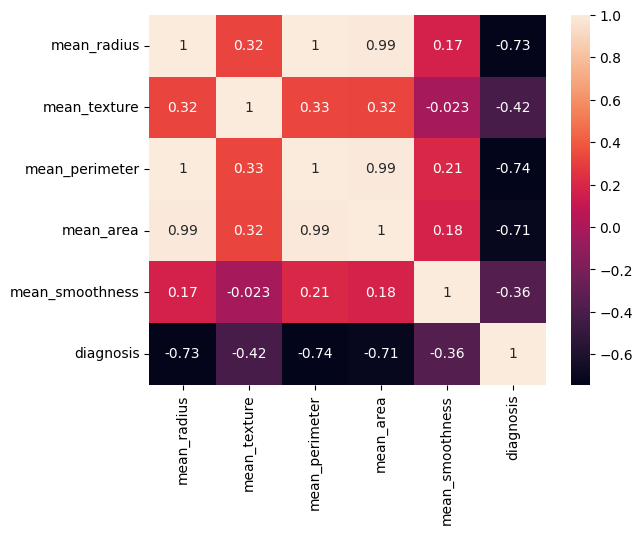

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
# High correlation of mean radius with mean area and mean perimeter so both can be dropped
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


# X and y matrix

In [11]:
feature_columns = ['mean_radius','mean_texture','mean_smoothness']
X = data[feature_columns].values
y = data['diagnosis'].values

# Splitting into train and test datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Naives Bayes Classifier

### Instantiating and fitting the model

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb  = GaussianNB()
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


### Evaluating the model

In [14]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 92.11%


In [15]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.9403973509933775


In [16]:
print(confusion_matrix(y_test, y_pred))

[[34  5]
 [ 4 71]]


### Predicting the result

In [17]:
data.sample(1)

,mean_radius,mean_texture,mean_smoothness,diagnosis
406,16.14,14.86,0.09495,1


In [18]:
gnb.predict([[14.58,21.53,0.1054]])

array([0])